In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('California_Houses.csv')

In [3]:
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [4]:
df.isnull().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

In [5]:
df.shape

(20640, 14)

In [6]:
#Split the data into train and test

from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train,df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 1)

In [7]:
df_train.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
15961,255600.0,3.1908,52,1410,286,879,282,37.71,-122.43,4912.470057,554554.268712,732876.690332,63061.903217,7114.276009
1771,114600.0,3.6094,42,1485,290,971,303,37.95,-122.35,3323.585549,569333.701549,748249.151883,79297.161259,20833.948011
16414,137500.0,2.6250,16,50,10,20,6,37.90,-121.24,30431.132371,505647.348222,684872.890673,85137.686799,105550.038251
5056,118800.0,1.5143,34,5218,1576,3538,1371,34.02,-118.35,14399.287662,10431.769913,182268.213466,488102.964617,556099.844950
8589,422700.0,7.3356,38,1851,332,750,314,33.89,-118.39,3535.590283,22527.449793,173468.896016,496962.733452,564889.482296


In [8]:
df_test.shape

(4128, 14)

In [9]:
#scaling

for i in df_train.columns[:]:
    df_train[i]=(df_train[i] - df_train[i].min()) / (df_train[i].max() - df_train[i].min())

In [10]:
df_train.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
15961,0.496082,0.185577,1.000000,0.035811,0.045901,0.024552,0.052455,0.549416,0.187187,0.014360,0.544421,0.612145,0.075000,0.007395
1771,0.205362,0.214445,0.803922,0.037718,0.046545,0.027131,0.056375,0.574920,0.195195,0.009599,0.558942,0.624994,0.094485,0.022634
16414,0.252578,0.146557,0.294118,0.001221,0.001450,0.000476,0.000933,0.569607,0.306306,0.090836,0.496372,0.572023,0.101494,0.116729
5056,0.214022,0.069958,0.647059,0.132662,0.253664,0.099078,0.255740,0.157279,0.595596,0.042791,0.009836,0.151938,0.585111,0.617158
8589,0.840617,0.471421,0.725490,0.047027,0.053310,0.020937,0.058428,0.143464,0.591592,0.010234,0.021719,0.144583,0.595744,0.626921


In [11]:
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

In [12]:
X= df_train.drop('Median_House_Value', axis=1)
y= df_train.Median_House_Value

X.shape, y.shape

((16512, 13), (16512,))

In [13]:
unique_classes, class_counts = np.unique(y, return_counts=True)

In [14]:
problematic_class = unique_classes[class_counts == 1][0]

In [15]:
problematic_class

0.005156679766269005

In [16]:
# Filter out the rows with the problematic class
X_filtered = X[y != problematic_class]
y_filtered = y[y != problematic_class]


In [17]:
X_filtered.shape, y_filtered.shape

((16511, 13), (16511,))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((13208, 13), (3303, 13), (13208,), (3303,))

In [19]:
#model building

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense 

### model 1

In [41]:
model = Sequential()

In [42]:
model.add(Dense(20,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='linear'))

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                280       
                                                                 
 dense_13 (Dense)            (None, 20)                420       
                                                                 
 dense_14 (Dense)            (None, 20)                420       
                                                                 
 dense_15 (Dense)            (None, 20)                420       
                                                                 
 dense_16 (Dense)            (None, 20)                420       
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,981
Trainable params: 1,981
Non-traina

In [44]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [45]:
history = model.fit(X_train,y_train,epochs=200, batch_size=10,verbose=1, validation_split=0.2)

Epoch 1/200
1057/1057 [==============================] - 4s 3ms/step - loss: 0.0253 - val_loss: 0.0186
Epoch 2/200
1057/1057 [==============================] - 3s 3ms/step - loss: 0.0198 - val_loss: 0.0176
Epoch 3/200
1057/1057 [==============================] - 3s 3ms/step - loss: 0.0190 - val_loss: 0.0166
Epoch 4/200
1057/1057 [==============================] - 3s 2ms/step - loss: 0.0181 - val_loss: 0.0166
Epoch 5/200
1057/1057 [==============================] - 3s 3ms/step - loss: 0.0174 - val_loss: 0.0161
Epoch 6/200
1057/1057 [==============================] - 4s 4ms/step - loss: 0.0171 - val_loss: 0.0162
Epoch 7/200
1057/1057 [==============================] - 4s 4ms/step - loss: 0.0168 - val_loss: 0.0158
Epoch 8/200
1057/1057 [==============================] - 5s 4ms/step - loss: 0.0164 - val_loss: 0.0149
Epoch 9/200
1057/1057 [==============================] - 5s 4ms/step - loss: 0.0162 - val_loss: 0.0147
Epoch 10/200
1057/1057 [==============================] - 4s 4ms/step - l

In [46]:
y_pred = model.predict(X_test)

104/104 [==============================] - 1s 3ms/step


In [47]:
y_pred.shape

(3303, 1)

In [48]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8059438055624262

In [49]:
history.history

{'loss': [0.025285005569458008,
  0.019838228821754456,
  0.019026635214686394,
  0.018067024648189545,
  0.017442533746361732,
  0.0171215757727623,
  0.016759688034653664,
  0.016417155042290688,
  0.016202721744775772,
  0.01589157059788704,
  0.015647293999791145,
  0.015295546501874924,
  0.015034433454275131,
  0.014969260431826115,
  0.014783181250095367,
  0.014664152637124062,
  0.014515236020088196,
  0.014309891499578953,
  0.014409524388611317,
  0.014097760431468487,
  0.014020883478224277,
  0.014039261266589165,
  0.013987082988023758,
  0.013902567327022552,
  0.013796618208289146,
  0.013654247857630253,
  0.013402522541582584,
  0.013514189049601555,
  0.013578292913734913,
  0.013420524075627327,
  0.013374286703765392,
  0.013281756080687046,
  0.013070276007056236,
  0.01322842575609684,
  0.013038648292422295,
  0.01301501039415598,
  0.013009092770516872,
  0.012849938124418259,
  0.012957279570400715,
  0.01294846460223198,
  0.01287807710468769,
  0.01284549199

### Evaluating ModelPerformance on Validation Set

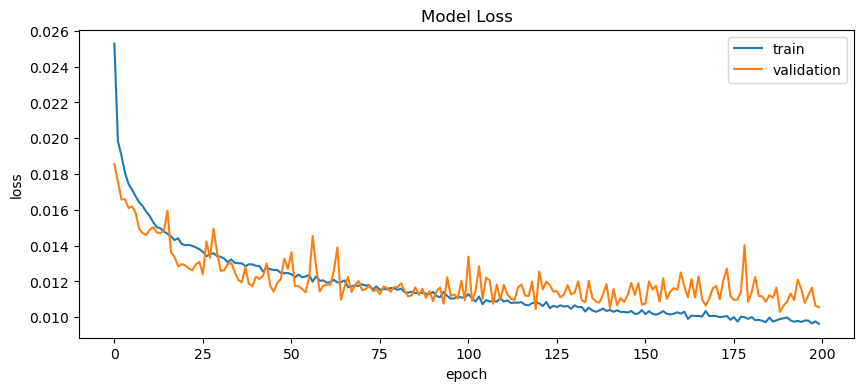

In [50]:
# summarize history for loss

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])   # validation loss values

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')

plt.show()

In [28]:
# #Model evaluation and Improvement 
# 1) Increase the number of epoch
# 2) increase nodes in the hidden layer
# 3) add more layers

### model 2

In [31]:
model=Sequential()

In [32]:
model.add(Dense(20,activation='leaky_relu',input_dim=X_train.shape[1]))
model.add(Dense(20,activation='leaky_relu'))
model.add(Dense(25,activation='leaky_relu'))
model.add(Dense(20,activation='leaky_relu'))
model.add(Dense(20,activation='leaky_relu'))
model.add(Dense(25,activation='leaky_relu'))
model.add(Dense(20,activation='leaky_relu'))
model.add(Dense(1,activation='linear'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                280       
                                                                 
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dense_10 (Dense)            (None, 25)                525       
                                                                 
 dense_11 (Dense)            (None, 20)                520       
                                                                 
 dense_12 (Dense)            (None, 20)                420       
                                                                 
 dense_13 (Dense)            (None, 25)                525       
                                                                 
 dense_14 (Dense)            (None, 20)               

In [34]:
model.compile(optimizer='RMSprop',loss='mean_absolute_error')

In [35]:
history=model.fit(X_train,y_train,epochs=200, batch_size=20,verbose=1,validation_split=0.2)

Epoch 1/200
529/529 [==============================] - 2s 3ms/step - loss: 0.1226 - val_loss: 0.1042
Epoch 2/200
529/529 [==============================] - 1s 2ms/step - loss: 0.1005 - val_loss: 0.1166
Epoch 3/200
529/529 [==============================] - 1s 2ms/step - loss: 0.0980 - val_loss: 0.1102
Epoch 4/200
529/529 [==============================] - 1s 2ms/step - loss: 0.0959 - val_loss: 0.0903
Epoch 5/200
529/529 [==============================] - 1s 2ms/step - loss: 0.0941 - val_loss: 0.0899
Epoch 6/200
529/529 [==============================] - 1s 2ms/step - loss: 0.0928 - val_loss: 0.0910
Epoch 7/200
529/529 [==============================] - 1s 2ms/step - loss: 0.0920 - val_loss: 0.0879
Epoch 8/200
529/529 [==============================] - 1s 2ms/step - loss: 0.0903 - val_loss: 0.0882
Epoch 9/200
529/529 [==============================] - 1s 2ms/step - loss: 0.0902 - val_loss: 0.0950
Epoch 10/200
529/529 [==============================] - 1s 2ms/step - loss: 0.0891 - val_lo

In [36]:
y_pred = model.predict(X_test)

104/104 [==============================] - 0s 1ms/step


In [37]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8068179682019034

In [38]:
history.history

{'loss': [0.12255895137786865,
  0.10047532618045807,
  0.09798149019479752,
  0.09588979184627533,
  0.09409967809915543,
  0.09283766150474548,
  0.09199808537960052,
  0.09025920927524567,
  0.09024841338396072,
  0.08908850699663162,
  0.08868532627820969,
  0.08780372887849808,
  0.08683018386363983,
  0.08652141690254211,
  0.08591938763856888,
  0.08576517552137375,
  0.08474224805831909,
  0.08470475673675537,
  0.08417626470327377,
  0.08428243547677994,
  0.0836266577243805,
  0.08281747251749039,
  0.08274887502193451,
  0.08199070394039154,
  0.08185538649559021,
  0.08139633387327194,
  0.08112726360559464,
  0.08087188005447388,
  0.08025293052196503,
  0.07985220849514008,
  0.07976404577493668,
  0.07898977398872375,
  0.0788770243525505,
  0.07914291322231293,
  0.07861974090337753,
  0.07846798002719879,
  0.07818133383989334,
  0.07732240855693817,
  0.07822982966899872,
  0.07749325037002563,
  0.07738660275936127,
  0.07694603502750397,
  0.07694385200738907,
  0.0

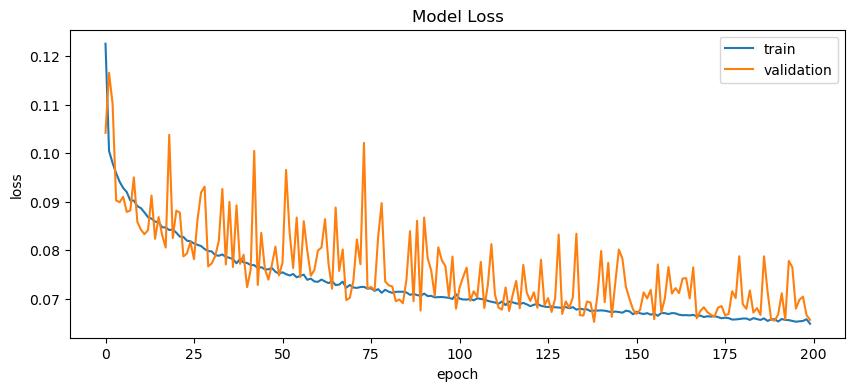

In [39]:
# summarize history for loss

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])   # validation loss values

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')

plt.show()

### model 3

In [58]:
model=Sequential()

In [59]:
model.add(Dense(50,activation='tanh',input_dim=X_train.shape[1]))
model.add(Dense(50,activation='tanh'))
model.add(Dense(50,activation='tanh'))
model.add(Dense(50,activation='tanh'))
model.add(Dense(50,activation='tanh'))
model.add(Dense(50,activation='tanh'))
model.add(Dense(50,activation='tanh'))
model.add(Dense(1,activation='linear'))

In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 50)                700       
                                                                 
 dense_28 (Dense)            (None, 50)                2550      
                                                                 
 dense_29 (Dense)            (None, 50)                2550      
                                                                 
 dense_30 (Dense)            (None, 50)                2550      
                                                                 
 dense_31 (Dense)            (None, 50)                2550      
                                                                 
 dense_32 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10,951
Trainable params: 10,951
Non-trai

In [61]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [62]:
history=model.fit(X_train,y_train,epochs=300, batch_size=30,verbose=1,validation_split=0.2)

Epoch 1/300
353/353 [==============================] - 3s 5ms/step - loss: 0.0252 - val_loss: 0.0234
Epoch 2/300
353/353 [==============================] - 1s 4ms/step - loss: 0.0212 - val_loss: 0.0173
Epoch 3/300
353/353 [==============================] - 2s 5ms/step - loss: 0.0195 - val_loss: 0.0180
Epoch 4/300
353/353 [==============================] - 1s 4ms/step - loss: 0.0186 - val_loss: 0.0177
Epoch 5/300
353/353 [==============================] - 2s 5ms/step - loss: 0.0183 - val_loss: 0.0171
Epoch 6/300
353/353 [==============================] - 2s 6ms/step - loss: 0.0178 - val_loss: 0.0161
Epoch 7/300
353/353 [==============================] - 2s 5ms/step - loss: 0.0177 - val_loss: 0.0157
Epoch 8/300
353/353 [==============================] - 2s 5ms/step - loss: 0.0175 - val_loss: 0.0161
Epoch 9/300
353/353 [==============================] - 2s 4ms/step - loss: 0.0172 - val_loss: 0.0159
Epoch 10/300
353/353 [==============================] - 2s 5ms/step - loss: 0.0170 - val_lo

In [63]:
y_pred = model.predict(X_test)

104/104 [==============================] - 0s 2ms/step


In [64]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7932525169033819

In [65]:
history.history

{'loss': [0.025165172293782234,
  0.021192995831370354,
  0.019482865929603577,
  0.018638024106621742,
  0.018345361575484276,
  0.017763949930667877,
  0.017676495015621185,
  0.017531471326947212,
  0.01718127168715,
  0.016978593543171883,
  0.016689281910657883,
  0.016594553366303444,
  0.016571814194321632,
  0.016588665544986725,
  0.016460111364722252,
  0.016291452571749687,
  0.01638733595609665,
  0.016067426651716232,
  0.015783099457621574,
  0.015922825783491135,
  0.015503480099141598,
  0.01567167416214943,
  0.01587595045566559,
  0.015877889469265938,
  0.015483884140849113,
  0.015529544092714787,
  0.014987952075898647,
  0.014961183071136475,
  0.015219069086015224,
  0.014867531135678291,
  0.014823638834059238,
  0.01508529856801033,
  0.014560068026185036,
  0.0144047187641263,
  0.014565096236765385,
  0.014714316464960575,
  0.014264289289712906,
  0.014397094957530499,
  0.01437362004071474,
  0.014225518330931664,
  0.014133061282336712,
  0.014521352015435

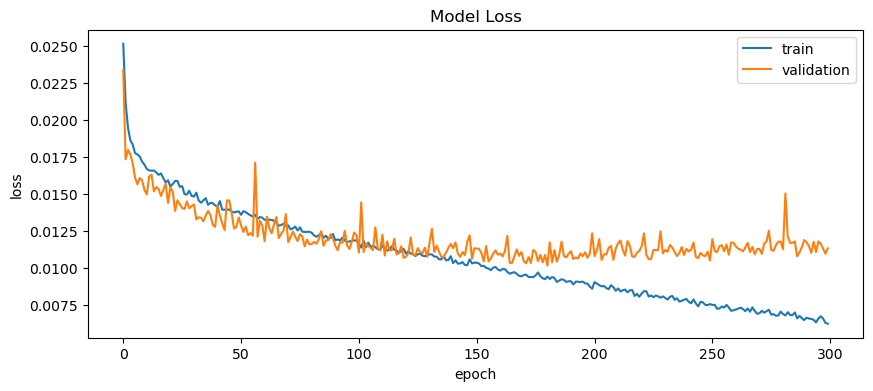

In [66]:
# summarize history for loss

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])   # validation loss values

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')

plt.show()

### model 4

In [81]:
model=Sequential()

In [82]:
model.add(Dense(20,activation='PReLU',input_dim=X_train.shape[1]))
model.add(Dense(20,activation='PReLU'))
model.add(Dense(20,activation='PReLU'))
model.add(Dense(20,activation='PReLU'))
model.add(Dense(20,activation='PReLU'))
model.add(Dense(20,activation='PReLU'))
model.add(Dense(20,activation='PReLU'))
model.add(Dense(1,activation='linear'))

In [83]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 20)                300       
                                                                 
 dense_44 (Dense)            (None, 20)                440       
                                                                 
 dense_45 (Dense)            (None, 20)                440       
                                                                 
 dense_46 (Dense)            (None, 20)                440       
                                                                 
 dense_47 (Dense)            (None, 20)                440       
                                                                 
 dense_48 (Dense)            (None, 20)                440       
                                                                 
 dense_49 (Dense)            (None, 20)               

In [84]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [85]:
history=model.fit(X_train,y_train,epochs=300, batch_size=30,verbose=1,validation_split=0.2)

Epoch 1/300
353/353 [==============================] - 4s 6ms/step - loss: 0.0328 - val_loss: 0.0193
Epoch 2/300
353/353 [==============================] - 2s 5ms/step - loss: 0.0200 - val_loss: 0.0187
Epoch 3/300
353/353 [==============================] - 2s 5ms/step - loss: 0.0190 - val_loss: 0.0193
Epoch 4/300
353/353 [==============================] - 2s 5ms/step - loss: 0.0185 - val_loss: 0.0178
Epoch 5/300
353/353 [==============================] - 2s 5ms/step - loss: 0.0178 - val_loss: 0.0165
Epoch 6/300
353/353 [==============================] - 2s 5ms/step - loss: 0.0175 - val_loss: 0.0157
Epoch 7/300
353/353 [==============================] - 2s 5ms/step - loss: 0.0172 - val_loss: 0.0173
Epoch 8/300
353/353 [==============================] - 2s 5ms/step - loss: 0.0169 - val_loss: 0.0155
Epoch 9/300
353/353 [==============================] - 2s 5ms/step - loss: 0.0163 - val_loss: 0.0149
Epoch 10/300
353/353 [==============================] - 2s 5ms/step - loss: 0.0162 - val_lo

In [86]:
y_pred = model.predict(X_test)

104/104 [==============================] - 1s 3ms/step


In [87]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8092992425844263

In [88]:
history.history

{'loss': [0.032828737050294876,
  0.020040038973093033,
  0.019049614667892456,
  0.018456701189279556,
  0.017808973789215088,
  0.017496595159173012,
  0.017232973128557205,
  0.016942668706178665,
  0.016266975551843643,
  0.016208454966545105,
  0.015986232087016106,
  0.016065727919340134,
  0.01577094756066799,
  0.015439962036907673,
  0.01540814246982336,
  0.015027038753032684,
  0.01492903009057045,
  0.014805476181209087,
  0.01456448994576931,
  0.014385458081960678,
  0.014203648082911968,
  0.014066229574382305,
  0.01390095055103302,
  0.013848940841853619,
  0.013783203437924385,
  0.013620476238429546,
  0.013643794693052769,
  0.013479656539857388,
  0.013406222686171532,
  0.013562451116740704,
  0.013080659322440624,
  0.013220922090113163,
  0.013104417361319065,
  0.012903750874102116,
  0.01311842817813158,
  0.012908450327813625,
  0.012784556485712528,
  0.012887810356914997,
  0.012742956168949604,
  0.012871000915765762,
  0.012800702825188637,
  0.0130579331

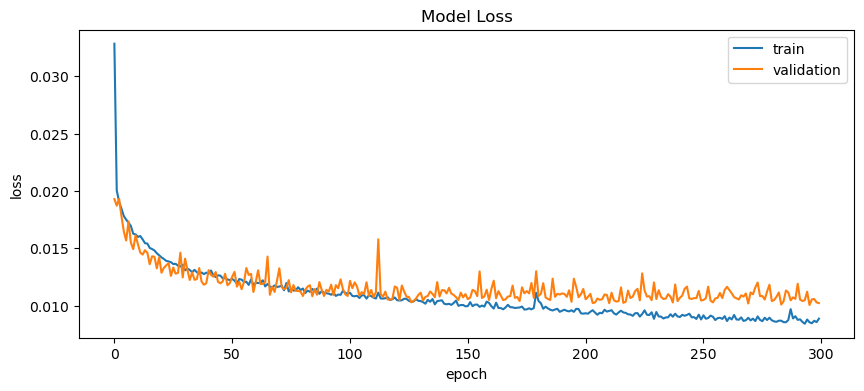

In [89]:
# summarize history for loss

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])   # validation loss values

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')

plt.show()